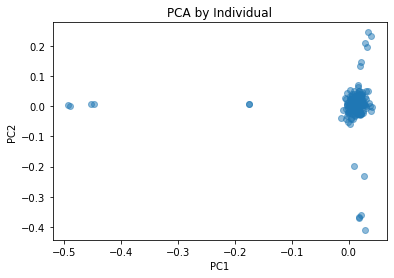

In [202]:
#1) Visualize PCA

import numpy as np
import matplotlib.pyplot as plt
#eig_vect = np.loadtxt("plink.eigenvec")

eig_vect = pd.read_table("plink.eigenvec",delimiter=" ")

x = eig_vect.iloc[:,2]
y = eig_vect.iloc[:,3]

plt.scatter(x, y, alpha=0.5)
plt.title("PCA by Individual")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 1.700e+01,
        1.010e+02, 5.270e+02, 1.802e+03, 3.687e+03, 4.841e+03, 4.908e+03,
        4.391e+03, 4.948e+03, 5.117e+03, 4.557e+03, 4.744e+03, 4.683e+03,
        3.749e+03, 4.707e+03, 4.474e+03, 4.349e+03, 4.304e+03, 4.185e+03,
        3.360e+03, 4.200e+03, 3.911e+03, 3.954e+03, 3.739e+03, 3.887e+03,
        2.553e+03, 3.806e+03, 3.717e+03, 3.603e+03, 3.495e+03, 3.643e+03,
        2.796e+03, 3.403e+03, 3.441e+03, 3.416e+03, 3.105e+03, 3.330e+03,
        3.276e+03, 2.521e+03, 3.185e+03, 3.004e+03, 2.732e+03, 3.071e+03,
        2.398e+03, 2.951e+03, 2.983e+03, 2.868e+03, 2.940e+03, 2.749e+03,
        2.866e+03, 2.229e+03, 2.804e+03, 2.674e+03, 2.747e+03, 2.758e+03,
        2.647e+03, 1.962e+03, 2.413e+03, 2.586e+03, 2.625e+03, 2.650e+03,
        2.446e+03, 1.966e+03, 2.503e+03, 2.362e+03, 2.501e+03, 2.443e+03,
        2.548e+03, 1.866e+03, 2.483e+03, 2.432e+03, 2.397e+03, 2.394e+03,
        2.263e+03, 1.894e+03, 2.371e+0

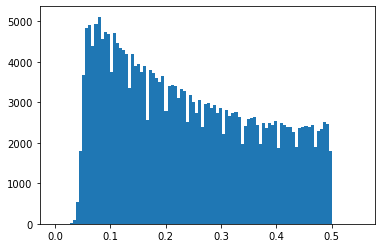

In [203]:
freq = pd.read_table("plink.frq", delim_whitespace=True)
freq.iloc[:,4]
plt.hist(freq.iloc[:,4], bins = 100, range=[0,0.55])

In [204]:
#Q4 For each phenotype, produce a QQ plot and Manhattan plot. For the Manhattan plot, 
#highlight SNPs with p-values less than 10-5 in a different color.
import pandas as pd

#Open both phenotype files
CB_pval = pd.read_table("resultsCB.assoc.linear", delim_whitespace=True)
GS_pval = pd.read_table("resultsGS.assoc.linear", delim_whitespace=True)

In [205]:
#set y values for QQplot
CB_y = CB_pval.iloc[:,8]
GS_y = GS_pval.iloc[:,8]

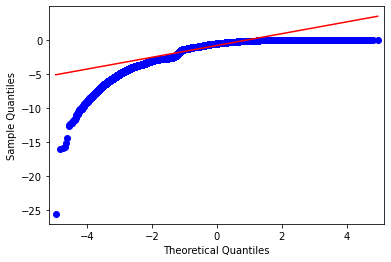

In [235]:
import numpy as np
import statsmodels.api as sm
import pylab as py
import math

#set y values for QQplot
CB_y = CB_pval.iloc[:,8]
GS_y = GS_pval.iloc[:,8]
  
# Random data points generated 
data_points = np.linspace(0,1,2825856)

#QQ plot for CB p values
sm.qqplot(np.log(np.sort(CB_y)), line ='s')
py.show()

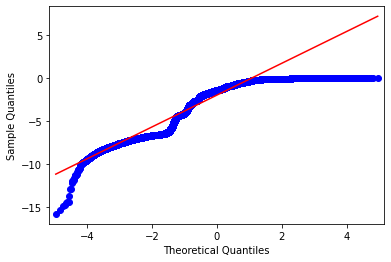

In [236]:
#QQ plot for GS p values
sm.qqplot(np.log(np.sort(GS_y)), line ='s')
py.show()

In [261]:
#4) Manhattan Plots for CB Drug
CB_pval

CB_pval2 = CB_pval.rename(columns={'CHR': '#CHROM', 'BP': "POS", 'SNP': 'ID'})
CB_pval2

,#CHROM,ID,POS,A1,TEST,NMISS,BETA,STAT,P
0,1,rs9699599,558185,G,ADD,84,1.172,1.841,0.070
1,1,rs9699599,558185,G,COV1,84,2.138,0.989,0.326
2,1,rs9699599,558185,G,COV2,84,3.133,1.242,0.218
3,1,rs9699599,558185,G,COV3,84,-0.226,-0.078,0.938
4,1,rs9699599,558185,G,COV4,84,-1.314,-0.278,0.782
...,...,...,...,...,...,...,...,...,...
2825851,22,rs6010063,49503799,G,COV6,165,1.047,0.461,0.645
2825852,22,rs6010063,49503799,G,COV7,165,-0.750,-0.342,0.733
2825853,22,rs6010063,49503799,G,COV8,165,-0.286,-0.125,0.900
2825854,22,rs6010063,49503799,G,COV9,165,-0.151,-0.067,0.947


In [262]:
import pandas as pd
import qmplot
from qmplot import manhattanplot

if __name__ == "__main__":
    df = CB_pval2.dropna(how="any", axis=0)  # clean data
    ax = manhattanplot(data=df, 
                       sign_marker_p=1e-5,  # highline the significant SNP with ``sign_marker_color`` color.
                   is_annotate_topsnp=True,  # annotate the top SNP
                   xticklabel_kws={"rotation": "vertical"},
                   is_show=False,
                       figname="CB_output_manhattan_plot.png")
    
#Note: the output file is saved in word doc

In [264]:
#4) Manhattan Plot for GS drug 

#format table to work with qmplot
GS_pval2 = GS_pval.rename(columns={'CHR': '#CHROM', 'BP': "POS", 'SNP': 'ID'})
GS_pval2

#generate manhattan plot
if __name__ == "__main__":
    df = GS_pval2.dropna(how="any", axis=0)  # clean data
    ax = manhattanplot(data=df, 
                       sign_marker_p=1e-5,  # highline the significant SNP with ``sign_marker_color`` color.
                   is_annotate_topsnp=True,  # annotate the top SNP
                   xticklabel_kws={"rotation": "vertical"},
                   is_show=False,
                       figname="GS_output_manhattan_plot.png")
    
#note: output manhattan plot is saved in my word doc

In [269]:
#5) For the top associated SNP, visualize the effect size by creating a boxplot 
#of the phenotype stratified by genotype.

#top SNP: rs10876043

#load vcf table
#vcf = read_vcf(genotypes.vcf)

import io
import os
import pandas as pd


def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

vcf = read_vcf("genotypes.vcf")

In [270]:
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
0,1,558185,rs9699599,A,G,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,740098,rs12138618,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,744045,rs3131969,A,G,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/0
3,1,767376,rs6672353,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,851671,rs13302982,A,G,.,.,PR,GT,0/1,...,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256891,22,49411684,rs762672,C,T,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/0,0/1,0/0,0/1,0/1,0/0,0/1
256892,22,49417023,rs131711,G,C,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
256893,22,49486501,rs2341011,T,C,.,.,PR,GT,1/1,...,0/1,1/1,0/1,1/1,0/1,0/0,1/1,1/1,0/1,0/1
256894,22,49503532,rs9628187,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/1


In [274]:
#isolate row of vcf with top associated SNP
vcf_rs = vcf.loc[vcf['ID'] == "rs10876043"]
vcf_rs

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
184404,12,49190411,rs10876043,A,G,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [277]:
#read in IC50 files for each drug
CB_IC50 = pd.read_table("CB1908_IC50.txt", delim_whitespace=True)
GS_IC50 = pd.read_table("GS451_IC50.txt", delim_whitespace=True)
GS_IC50

,FID,IID,GS451_IC50
0,1001,1001,5.594
1,1002,1002,8.526
2,1003,1003,12.737
3,1004,1004,12.175
4,1005,1005,9.937
...,...,...,...
171,1172,1172,5.725
172,1173,1173,5.604
173,1174,1174,7.065
174,1175,1175,6.716


In [296]:
#initialize separate lists by genotype, fill these with individual positions
#these positions we can use to pull phenotype data from IC50 lists
phenotype_AA = []
phenotype_AG = []
phenotype_GG = []
for i in range(0,176):
    if vcf_rs.iloc[0,i+9] == '0/0':
        phenotype_AA.append(i)
    if vcf_rs.iloc[0,i+9] == '0/1':
        phenotype_AG.append(i)
    if vcf_rs.iloc[0,i+9] == '1/1':
        phenotype_GG.append(i)
#check that loop worked
phenotype_GG

[6, 7, 10, 30, 31, 69, 71, 88]

In [308]:
#CB drug boxplot
#initialize boxplot lists
boxplot_AA = CB_IC50.iloc[phenotype_AA,2]
boxplot_AG = CB_IC50.iloc[phenotype_AG,2]
boxplot_GG = CB_IC50.iloc[phenotype_GG,2]

#check that these filled correctly
boxplot_AG

0       6.927
1      11.887
3      11.953
4       8.836
5       8.154
        ...  
84      6.126
85     10.293
87      5.824
89      7.108
130     6.907
Name: CB1908_IC50, Length: 73, dtype: float64

Text(0.5, 0, 'Genotype')

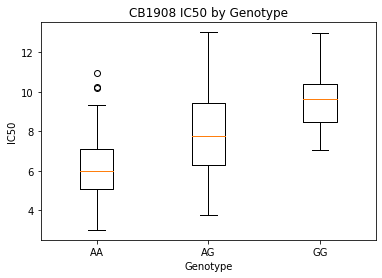

In [326]:
#remove nan from AG list
boxplot_AG = [x for x in boxplot_AG if np.isnan(x) == False]

#creat boxplot
plt.boxplot([boxplot_AA, boxplot_AG, boxplot_GG])
plt.xticks([1, 2, 3], ['AA', 'AG', 'GG'])
plt.title("CB1908 IC50 by Genotype")
plt.ylabel("IC50")
plt.xlabel("Genotype")